# Decison tree Algorithm

We will work on Decision tress working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on diabetes dataset using Python Scikit-learn package.

Also, discuss its pros, cons, and optimizing Decision Tree performance using parameter tuning.

Link for Algorithm and Theory: https://www.datacamp.com/community/tutorials/decision-tree-classification-python


Here the prediction can be done by Label(Binary-> YES OR NO) Assigned, so it is supervised learning


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns

# Step-1 Lodading data set

In [2]:
pima1 = pd.read_csv("diabetes.csv")
pima1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


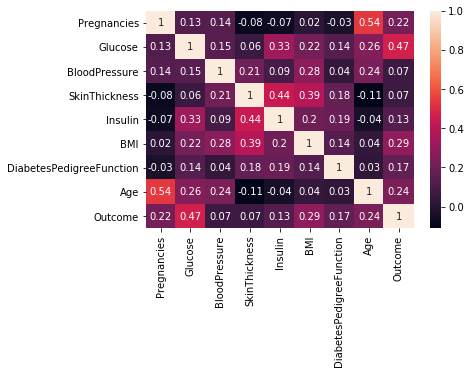

In [3]:
#just a correlated matrix.

correlation_matrix = pima1.corr().round(2)  # works for only dataframes.
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [6]:
pima1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
pima1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
pima1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Step-2 Feauture Selection

Here, we need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [22]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = pima1[feature_cols] # Features
y = pima1.Outcome # Target variable

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#test_size=0.3 means we give 30 to test and 70 to train.

# Step-4 Building Decision Tree Model and Evaluating

In [24]:
# Create Decision Tree classifer object



clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
#Checking prediction to single value

clf.predict([[12,55, 88, 45, 11, 222, 828,443]])

array([1], dtype=int64)

In [26]:
# Evaluating

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


# Step-5 Visualise the decision tree as image for given data

We need to install libraries of graphviz and pydotplus

export_graphviz function converts decision tree classifier into dot file and 

pydotplus convert this dot file to png or displayable form on Jupyter.


Here in the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.jpeg')
Image(graph.create_png())

# Step-6 Optimizing Decision Tree Performance and Visualising trees.

criterion : optional (default=”gini”) or Choose attribute selection measure: 
        This parameter allows us to use the different-different attribute selection measure. 
        Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: 
           This parameter allows us to choose the split strategy. 
           Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. 
             If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.
            The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning.
Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, 
wecan plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters,
we can also try other attribute selection measure such as entropy.

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.jpeg')
Image(graph.create_png())

# Benifits and Consequences 

Pros

Decision trees are easy to interpret and visualize.

It can easily capture Non-linear patterns.

It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

It can be used for feature engineering such as predicting missing values, suitable for variable selection.

The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. 

Cons

Sensitive to noisy data.

It can overfit noisy data.

The small variation(or variance) in data can result in the different decision tree. 

This can be reduced by bagging and boosting algorithms.

Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.